In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 10)
plt.rcParams["font.size"] = 14

df = pd.read_csv("Reviews.csv", nrows=10000)



# (1)

In [9]:
score_count = df.groupby(["UserId", "ProfileName"])["Score"].count()
score_mean = df.groupby(["UserId", "ProfileName"])["Score"].mean()
a = pd.DataFrame({"Score count": score_count, "Score mean": score_mean})
a.sort_values("Score count", ascending=False).head(10)

,,Score count,Score mean
UserId,ProfileName,,
A1Z54EM24Y40LL,c2,17,3.882353
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
A35R32TA60XD57,M. Torma,9,4.111111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
A3NHUQ33CFH3VM,Citizen John,7,3.142857
A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
A26NFIQ7KWI8Y7,kt rose,6,2.666667


# (2)

<Container object of 5 artists>

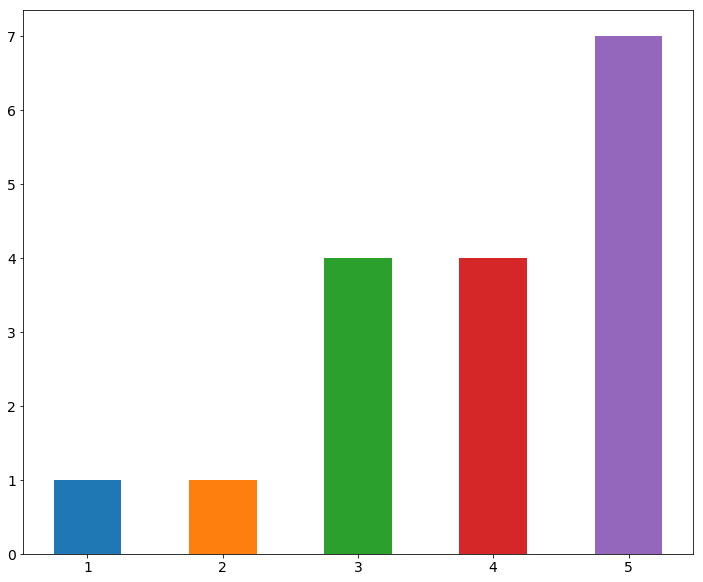

In [123]:
most = score_count.sort_values(ascending=False).index[0][0]

data = df[df["UserId"] == most]["Score"].value_counts().sort_index()
colour = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
plt.bar(np.arange(1,6), data, color=colour, width=0.5)

# (3)

Text(0,0.5,'Review count')

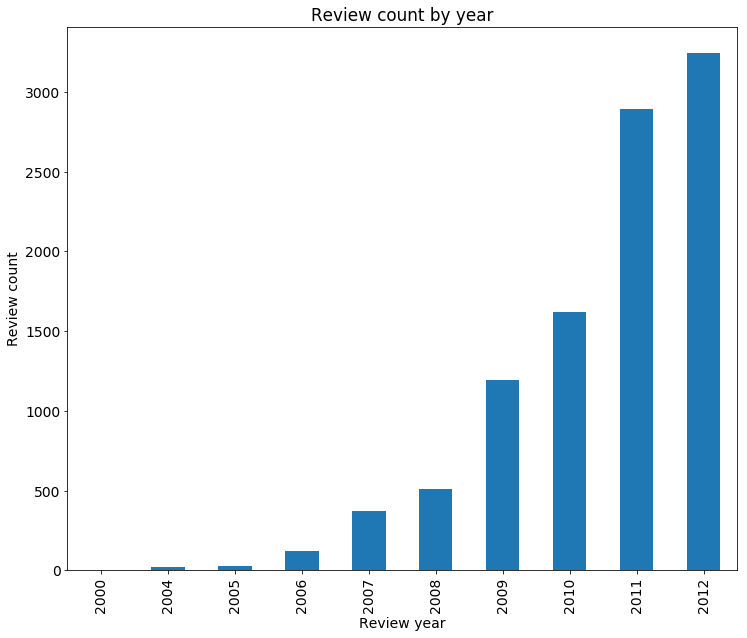

In [122]:
df["Date"] = df["Time"].apply(lambda x: datetime.fromtimestamp(x).strftime("%Y"))
ax = df.groupby("Date")["Text"].count().plot(kind="bar", color="tab:blue", title="Review count by year")
ax.set_xlabel("Review year")
ax.set_ylabel("Review count")

# (4)

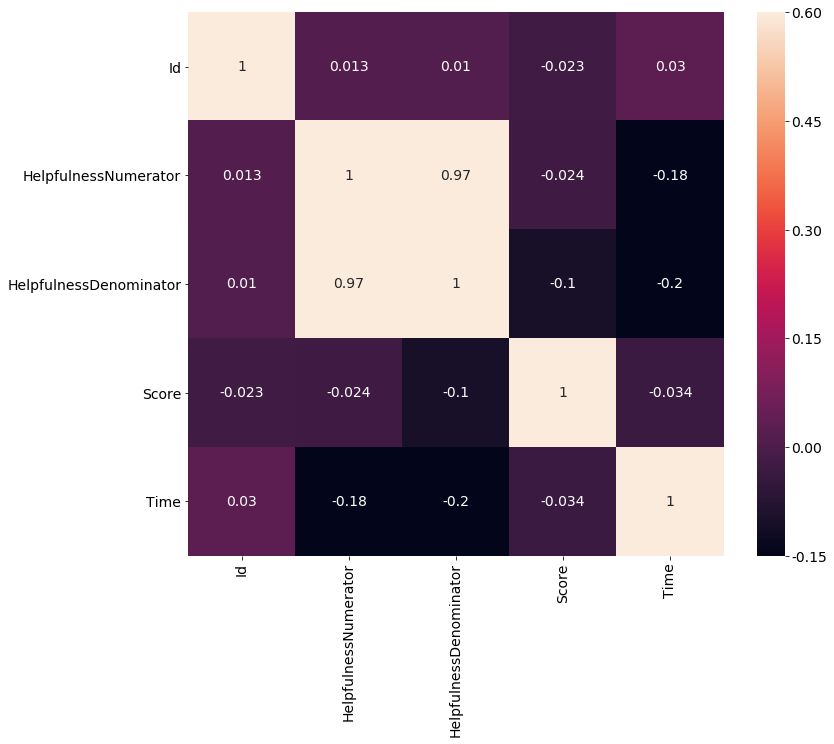

In [120]:
corr = df[["Id", "HelpfulnessNumerator", "HelpfulnessDenominator", "Score", "Time"]].corr()
sns.heatmap(corr, annot=True, vmin=-0.15, vmax=0.6)

# (5)

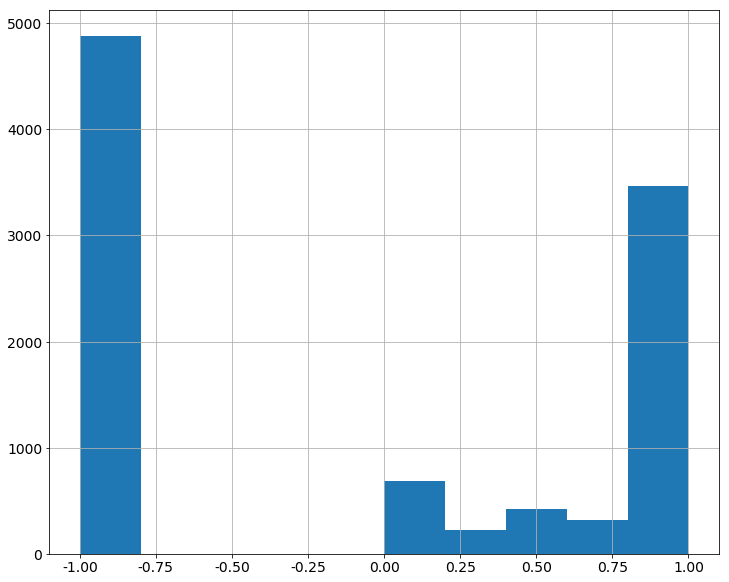

In [7]:
df.head()

tmp = df[(df["HelpfulnessNumerator"] <= df["HelpfulnessDenominator"]) & 
          (df["HelpfulnessNumerator"]) != 0 & (df["HelpfulnessDenominator"] != 0)]
tmp = df["HelpfulnessNumerator"] / df["HelpfulnessDenominator"]
zero = df[(df["HelpfulnessNumerator"] == 0) & (df["HelpfulnessDenominator"] == 0)].count()
percent = pd.concat([tmp, pd.Series([-1 for i in range(zero.iloc[0])])])
percent.hist()
